<a href="https://colab.research.google.com/github/nisha1365/BitGritChallenge/blob/main/Bird_Species_Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [174]:
train_set = pd.read_csv('/content/training_set.csv')
train_set

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103
...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,NaN,3500.0,1.0,45
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47


In [176]:
train_target = pd.read_csv('/content/training_target.csv')
train_target

,ID,species
0,284,C
1,101,C
2,400,B
3,98,C
4,103,C
...,...,...
430,45,B
431,398,A
432,156,A
433,47,B


In [177]:
merged_df = pd.merge(train_set, train_target,on = "ID")
merged_df

,bill_depth,bill_length,wing_length,location,mass,sex,ID,species
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284,C
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101,C
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400,B
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98,C
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103,C
...,...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,NaN,3500.0,1.0,45,B
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398,A
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156,A
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47,B


In [178]:
merged_df.shape

(435, 8)

In [179]:
merged_df.dtypes

bill_depth     float64
bill_length    float64
wing_length    float64
location        object
mass           float64
sex            float64
ID               int64
species         object
dtype: object

In [180]:
merged_df.isnull().sum()

bill_depth       1
bill_length    140
wing_length    137
location        30
mass             2
sex             56
ID               0
species          0
dtype: int64

In [181]:
merged_df['location'].value_counts()

loc_2    181
loc_3    141
loc_1     83
Name: location, dtype: int64

In [182]:
num_missing = merged_df['location'].isnull().sum()
available_categories = merged_df['location'].dropna().unique()
category_counts = merged_df['location'].value_counts()

# calculate the probabilites by dividing category counts by total non-misssing
category_probs = category_counts / category_counts.sum()

# Generate imputed categories based on their freq
imputed_categories = np.random.choice(available_categories, size = num_missing, p = category_probs)
# Fill in the missing values with the imputed categories
merged_df.loc[merged_df['location'].isnull(), 'location'] = imputed_categories

In [183]:
merged_df.isnull().sum()

bill_depth       1
bill_length    140
wing_length    137
location         0
mass             2
sex             56
ID               0
species          0
dtype: int64

In [184]:
merged_df['location'].value_counts()

loc_2    195
loc_3    151
loc_1     89
Name: location, dtype: int64

In [185]:
encoded_locations = pd.get_dummies(merged_df['location'])
merged_df_encoded = pd.concat([merged_df, encoded_locations], axis = 1)
merged_df_encoded

,bill_depth,bill_length,wing_length,location,mass,sex,ID,species,loc_1,loc_2,loc_3
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284,C,0,1,0
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101,C,0,1,0
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400,B,0,0,1
3,14.982114,47.504878,NaN,loc_3,4800.0,0.0,98,C,0,0,1
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103,C,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,loc_3,3500.0,1.0,45,B,0,0,1
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398,A,0,0,1
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156,A,1,0,0
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47,B,0,1,0


In [186]:
merged_df_encoded.drop(columns = ['location'], inplace = True)
merged_df_encoded.head(2)

,bill_depth,bill_length,wing_length,mass,sex,ID,species,loc_1,loc_2,loc_3
0,14.3,48.2,210.0,4600.0,0.0,284,C,0,1,0
1,14.4,48.4,203.0,4625.0,0.0,101,C,0,1,0


In [187]:
species_column = merged_df_encoded.pop('species')
merged_df_encoded['species'] = species_column

In [188]:
merged_df_encoded.head()

,bill_depth,bill_length,wing_length,mass,sex,ID,loc_1,loc_2,loc_3,species
0,14.300000,48.200000,210.000000,4600.0,0.0,284,0,1,0,C
1,14.400000,48.400000,203.000000,4625.0,0.0,101,0,1,0,C
2,18.400000,NaN,200.000000,3400.0,0.0,400,0,0,1,B
3,14.982114,47.504878,NaN,4800.0,0.0,98,0,0,1,C
4,18.982114,38.259307,217.186992,5200.0,0.0,103,0,0,1,C


In [189]:
merged_df_encoded.isnull().sum()

bill_depth       1
bill_length    140
wing_length    137
mass             2
sex             56
ID               0
loc_1            0
loc_2            0
loc_3            0
species          0
dtype: int64

In [190]:
merged_df_encoded['sex'].value_counts()

1.0    195
0.0    184
Name: sex, dtype: int64

In [191]:
merged_df_encoded.describe()

,bill_depth,bill_length,wing_length,mass,sex,ID,loc_1,loc_2,loc_3
count,434.000000,295.000000,298.000000,433.000000,379.000000,435.000000,435.000000,435.000000,435.000000
mean,17.295551,46.168221,202.759399,4290.877598,0.514512,273.767816,0.204598,0.448276,0.347126
std,1.944587,5.056940,13.304036,793.306367,0.500450,158.447214,0.403872,0.497890,0.476605
min,13.100000,38.259307,172.000000,2700.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,15.225000,43.500000,193.000000,3675.000000,0.000000,136.500000,0.000000,0.000000,0.000000
50%,17.600000,47.500000,199.000000,4200.000000,1.000000,273.000000,0.000000,0.000000,0.000000
75%,18.982114,48.833824,215.000000,4875.000000,1.000000,411.000000,0.000000,1.000000,1.000000
max,21.500000,59.600000,231.000000,6300.000000,1.000000,544.000000,1.000000,1.000000,1.000000


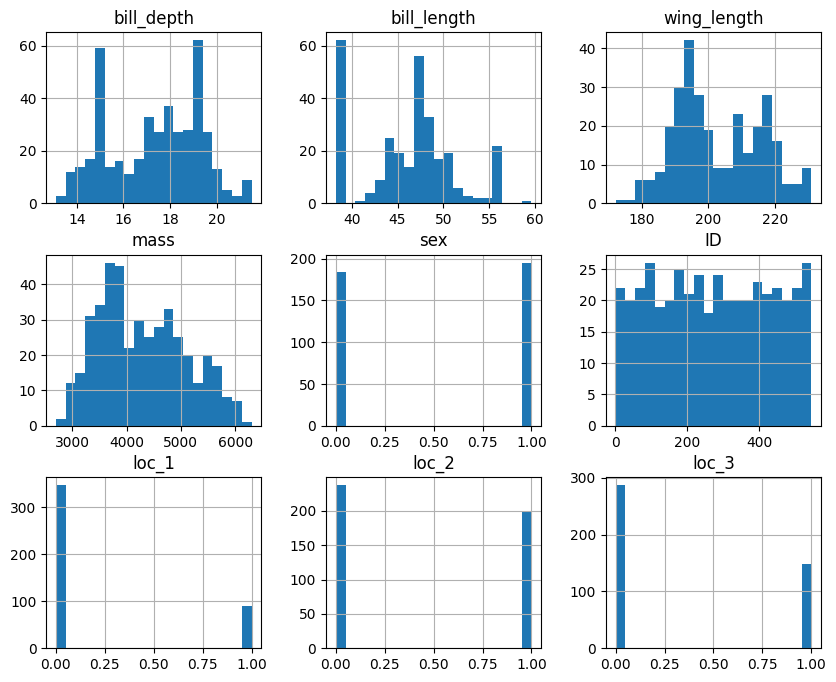

In [110]:
import matplotlib.pyplot as plt
merged_df_encoded.hist(bins = 20, figsize = (10,8))
plt.show()

<ipython-input-62-ae879e68a000>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df_encoded.corr()


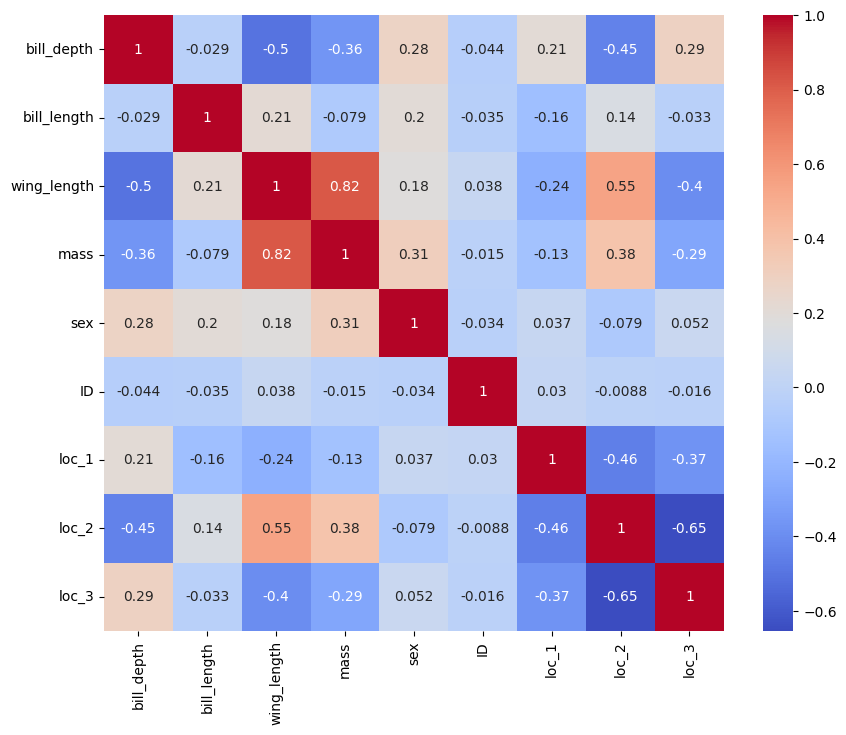

In [62]:
import seaborn as sns
correlation_matrix = merged_df_encoded.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

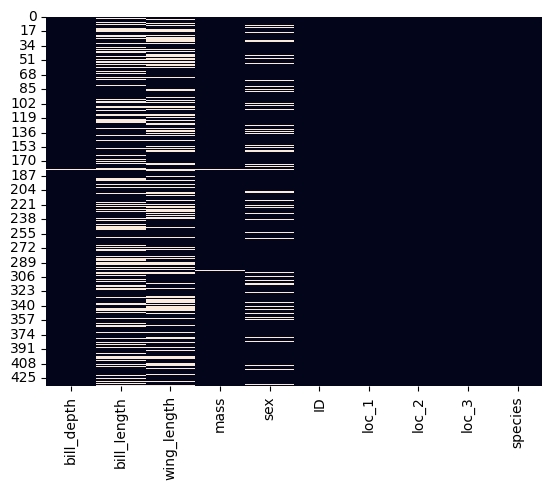

In [63]:
sns.heatmap(merged_df_encoded.isnull(), cbar = False)
plt.show()

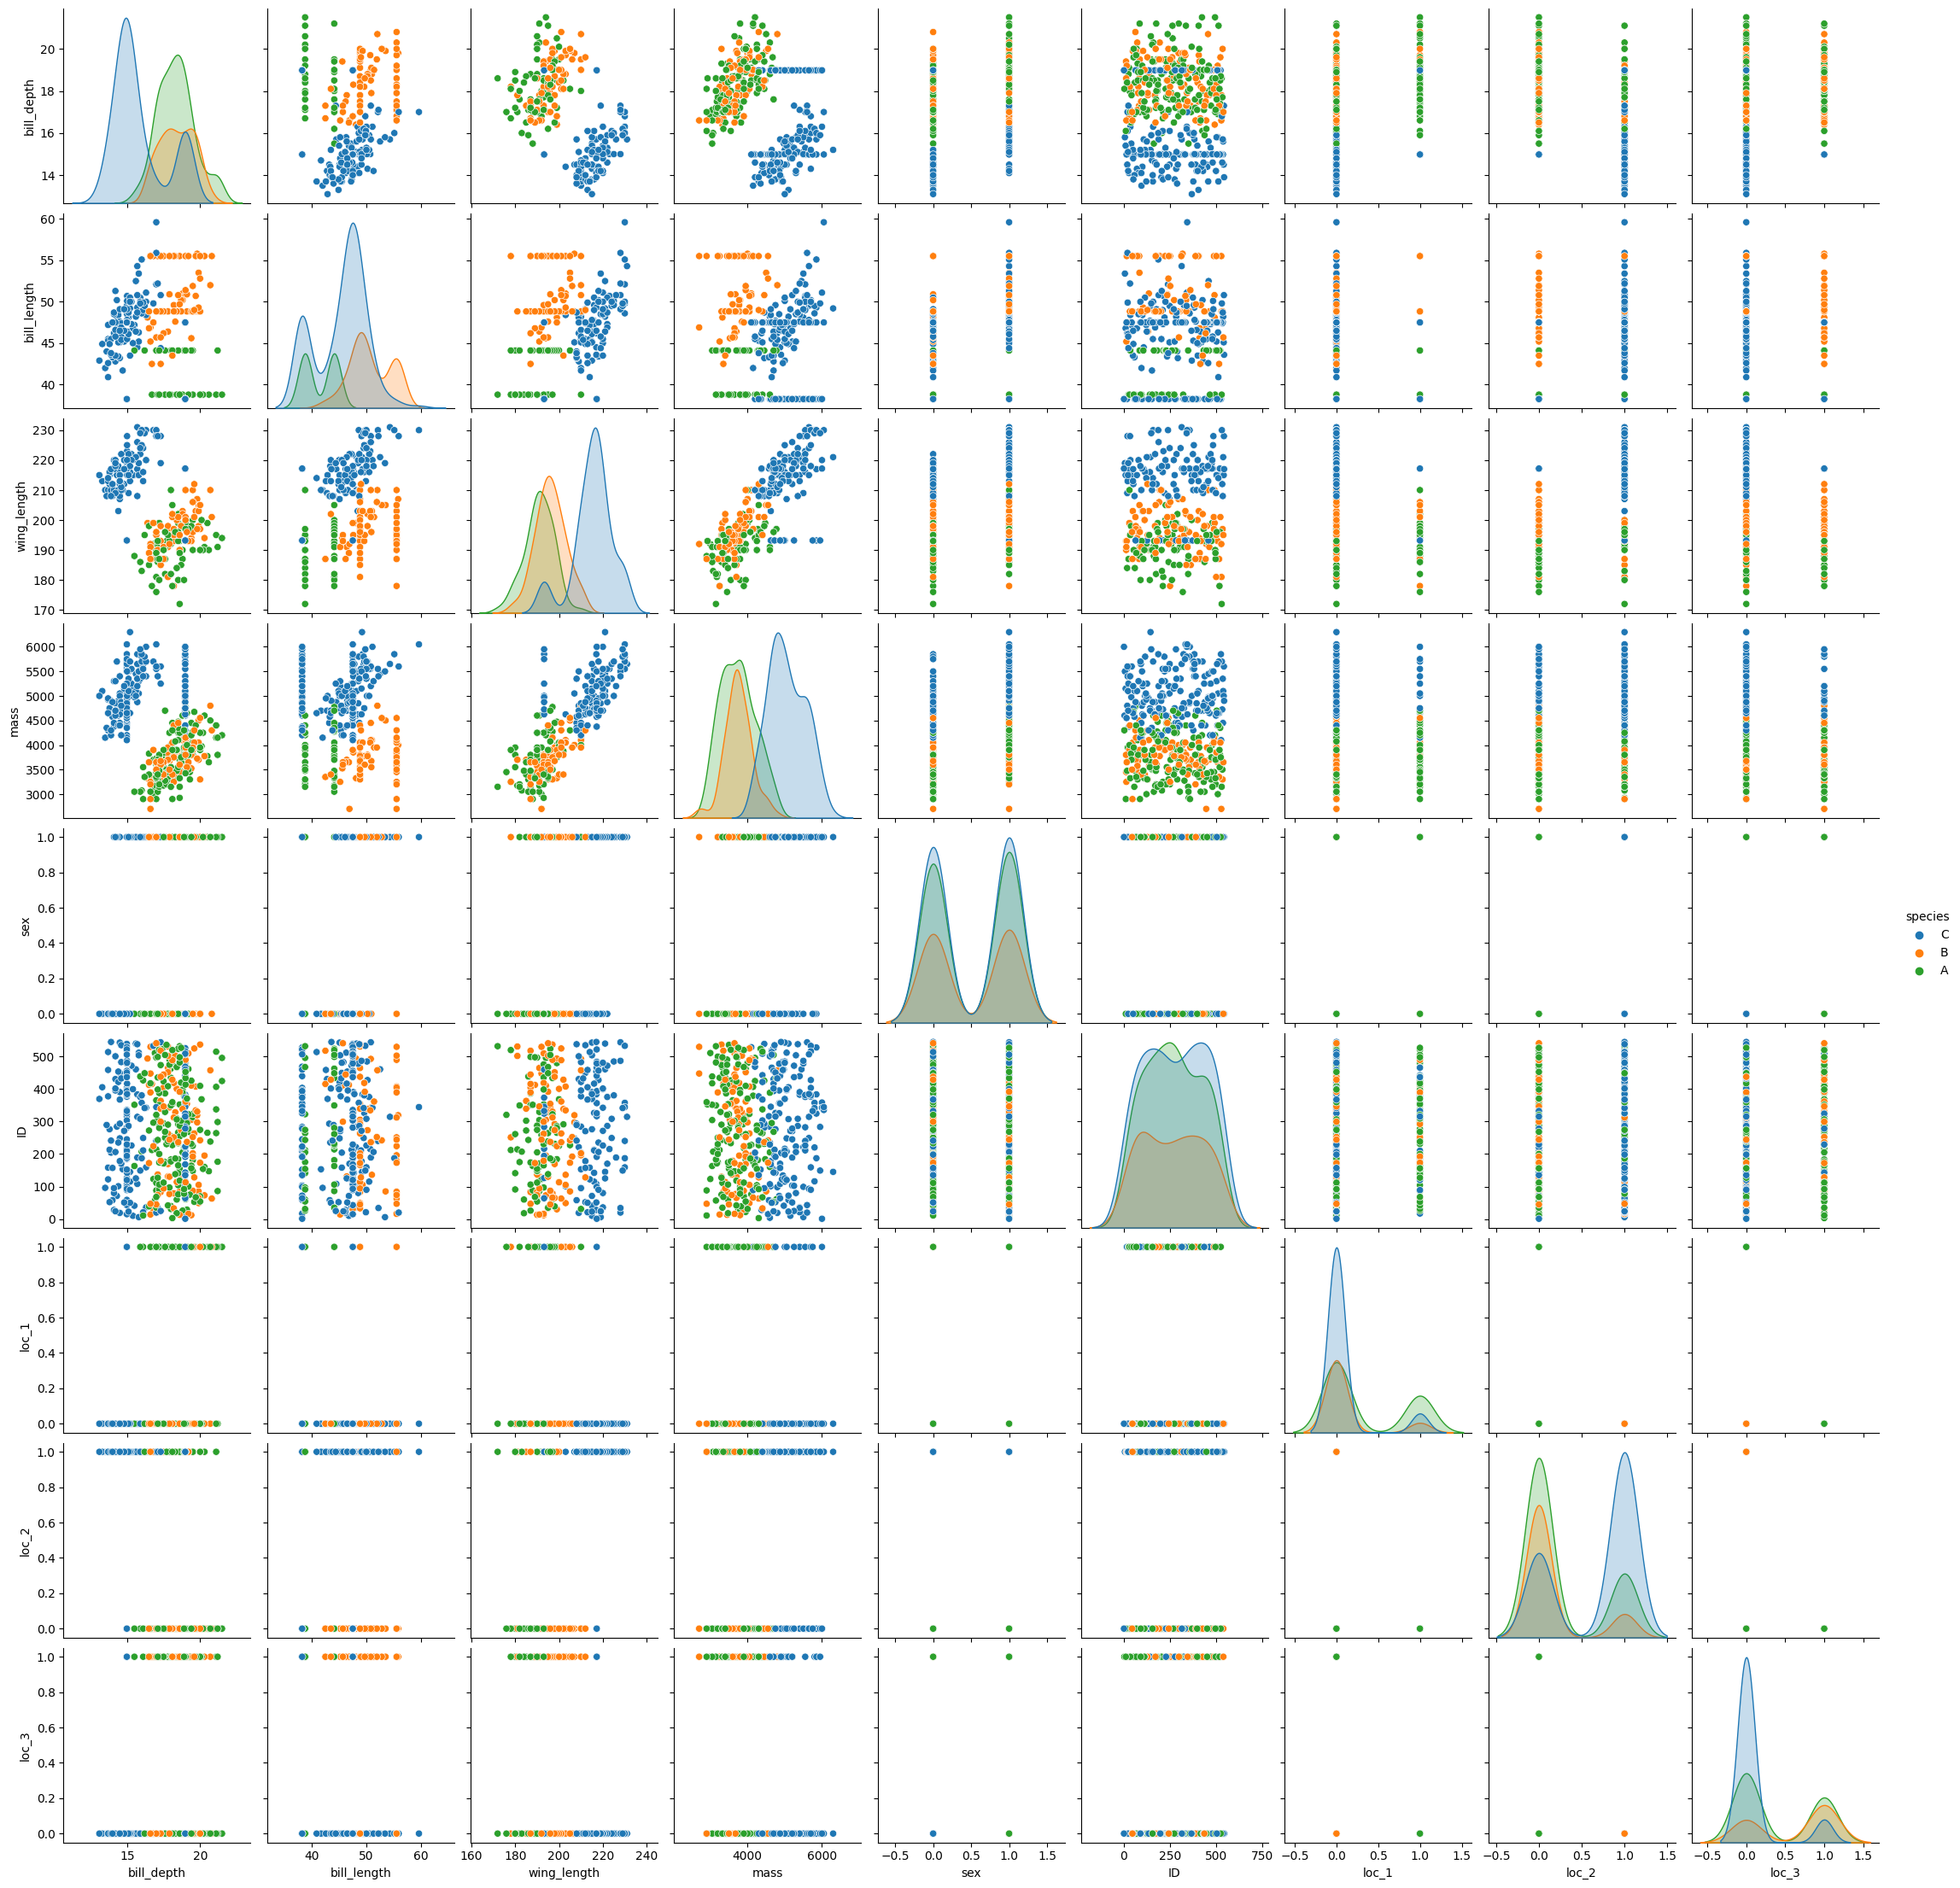

In [34]:
sns.pairplot(merged_df_encoded, hue = 'species')
plt.show()

In [192]:
merged_df_encoded.isnull().sum()

bill_depth       1
bill_length    140
wing_length    137
mass             2
sex             56
ID               0
loc_1            0
loc_2            0
loc_3            0
species          0
dtype: int64

In [193]:
# calculate mean for imputation
bill_depth_mean = merged_df_encoded['bill_depth'].mean()
bill_length_mean = merged_df_encoded['bill_length'].mean()
wing_length_mean = merged_df_encoded['wing_length'].mean()
mass_mean = merged_df_encoded['mass'].mean()

In [194]:
merged_df_encoded['bill_depth'].fillna(bill_depth_mean, inplace = True)
merged_df_encoded['bill_length'].fillna(bill_length_mean, inplace = True)
merged_df_encoded['wing_length'].fillna(wing_length_mean, inplace = True)
merged_df_encoded['mass'].fillna(mass_mean, inplace = True)

In [195]:
merged_df_encoded.isnull().sum()

bill_depth      0
bill_length     0
wing_length     0
mass            0
sex            56
ID              0
loc_1           0
loc_2           0
loc_3           0
species         0
dtype: int64

In [196]:
num_missing = merged_df_encoded['sex'].isnull().sum()

available_values = merged_df_encoded['sex'].dropna().unique()

imputed_sex = np.random.choice(available_values,size = num_missing)

merged_df_encoded.loc[merged_df_encoded['sex'].isnull(), 'sex'] = imputed_sex

In [197]:
merged_df_encoded.isnull().sum()

bill_depth     0
bill_length    0
wing_length    0
mass           0
sex            0
ID             0
loc_1          0
loc_2          0
loc_3          0
species        0
dtype: int64

In [198]:
merged_df_encoded['species'].value_counts()

C    182
A    160
B     93
Name: species, dtype: int64

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [200]:
merged_df_encoded.drop('ID', axis=1 , inplace = True)

In [201]:
merged_df_encoded.head()

,bill_depth,bill_length,wing_length,mass,sex,loc_1,loc_2,loc_3,species
0,14.300000,48.200000,210.000000,4600.0,0.0,0,1,0,C
1,14.400000,48.400000,203.000000,4625.0,0.0,0,1,0,C
2,18.400000,46.168221,200.000000,3400.0,0.0,0,0,1,B
3,14.982114,47.504878,202.759399,4800.0,0.0,0,0,1,C
4,18.982114,38.259307,217.186992,5200.0,0.0,0,0,1,C


In [202]:
X = merged_df_encoded.drop(columns = ['species'])
y = merged_df_encoded['species']

In [203]:
X.shape

(435, 8)

In [204]:
y.shape

(435,)

In [205]:
y

0      C
1      C
2      B
3      C
4      C
      ..
430    B
431    A
432    A
433    B
434    A
Name: species, Length: 435, dtype: object

In [206]:
y = y.astype("category")

In [207]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [208]:
y_train

66     A
277    B
234    C
31     A
84     B
      ..
71     A
106    A
270    C
348    A
102    C
Name: species, Length: 348, dtype: category
Categories (3, object): ['A', 'B', 'C']

In [209]:
X_train.shape, y_train.shape

((348, 8), (348,))

In [210]:
X_test.shape, y_test.shape

((87, 8), (87,))

In [136]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [137]:
y_pred = model.predict(X_test)

In [138]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           A       1.00      0.95      0.97        38
           B       0.89      1.00      0.94        16
           C       1.00      1.00      1.00        33

    accuracy                           0.98        87
   macro avg       0.96      0.98      0.97        87
weighted avg       0.98      0.98      0.98        87



In [139]:
test_data = pd.read_csv('/content/test_set.csv')
test_data.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.982114,38.259307,217.186992,loc_2,5400.0,0.0,2
1,13.200000,46.100000,211.000000,loc_2,4500.0,0.0,5
2,20.000000,NaN,197.000000,loc_3,3300.0,1.0,7
3,17.500000,38.791391,190.000000,loc_3,3900.0,NaN,8
4,18.900000,NaN,184.000000,loc_2,3550.0,1.0,9


In [140]:
test_data.isnull().sum()

bill_depth      1
bill_length    41
wing_length    38
location        6
mass            1
sex            17
ID              0
dtype: int64

In [141]:
test_data['location'].value_counts()

loc_2    47
loc_3    38
loc_1    18
Name: location, dtype: int64

In [142]:
num_missing = test_data['location'].isnull().sum()
available_categories = test_data['location'].dropna().unique()
category_counts = test_data['location'].value_counts()

# calculate the probabilites by dividing category counts by total non-misssing
category_probs = category_counts / category_counts.sum()

# Generate imputed categories based on their freq
imputed_categories = np.random.choice(available_categories, size = num_missing, p = category_probs)
# Fill in the missing values with the imputed categories
test_data.loc[test_data['location'].isnull(), 'location'] = imputed_categories

In [144]:
encoded_locations = pd.get_dummies(test_data['location'])
merged_test_encoded = pd.concat([test_data, encoded_locations], axis = 1)
merged_test_encoded

,bill_depth,bill_length,wing_length,location,mass,sex,ID,loc_1,loc_2,loc_3
0,14.982114,38.259307,217.186992,loc_2,5400.0,0.0,2,0,1,0
1,13.200000,46.100000,211.000000,loc_2,4500.0,0.0,5,0,1,0
2,20.000000,NaN,197.000000,loc_3,3300.0,1.0,7,0,0,1
3,17.500000,38.791391,190.000000,loc_3,3900.0,NaN,8,0,0,1
4,18.900000,NaN,184.000000,loc_2,3550.0,1.0,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...
104,19.000000,NaN,NaN,loc_1,3600.0,0.0,507,1,0,0
105,18.000000,NaN,210.000000,loc_1,4000.0,1.0,512,1,0,0
106,19.500000,49.000000,210.000000,loc_3,3950.0,1.0,516,0,0,1
107,17.900000,50.100000,190.000000,loc_3,3400.0,0.0,533,0,0,1


In [145]:
merged_test_encoded.drop(columns = ['location'], inplace = True)
merged_test_encoded.head(2)

,bill_depth,bill_length,wing_length,mass,sex,ID,loc_1,loc_2,loc_3
0,14.982114,38.259307,217.186992,5400.0,0.0,2,0,1,0
1,13.200000,46.100000,211.000000,4500.0,0.0,5,0,1,0


In [150]:
# calculate mean for imputation
bill_depth_mean = merged_test_encoded['bill_depth'].mean()
bill_length_mean = merged_test_encoded['bill_length'].mean()
wing_length_mean = merged_test_encoded['wing_length'].mean()
mass_mean = merged_test_encoded['mass'].mean()

In [151]:
merged_test_encoded['bill_depth'].fillna(bill_depth_mean, inplace = True)
merged_test_encoded['bill_length'].fillna(bill_length_mean, inplace = True)
merged_test_encoded['wing_length'].fillna(wing_length_mean, inplace = True)
merged_test_encoded['mass'].fillna(mass_mean, inplace = True)

In [155]:
num_missing = merged_test_encoded['sex'].isnull().sum()

available_values = merged_test_encoded['sex'].dropna().unique()

imputed_sex = np.random.choice(available_values,size = num_missing)
merged_test_encoded.loc[merged_test_encoded['sex'].isnull(), 'sex'] = imputed_sex

In [160]:
merged_test_encoded

,bill_depth,bill_length,wing_length,mass,sex,ID,loc_1,loc_2,loc_3
0,14.982114,38.259307,217.186992,5400.0,0.0,2,0,1,0
1,13.200000,46.100000,211.000000,4500.0,0.0,5,0,1,0
2,20.000000,46.027037,197.000000,3300.0,1.0,7,0,0,1
3,17.500000,38.791391,190.000000,3900.0,0.0,8,0,0,1
4,18.900000,46.027037,184.000000,3550.0,1.0,9,0,1,0
...,...,...,...,...,...,...,...,...,...
104,19.000000,46.027037,200.740295,3600.0,0.0,507,1,0,0
105,18.000000,46.027037,210.000000,4000.0,1.0,512,1,0,0
106,19.500000,49.000000,210.000000,3950.0,1.0,516,0,0,1
107,17.900000,50.100000,190.000000,3400.0,0.0,533,0,0,1


In [164]:
merged_test_encoded.drop('ID', axis = 1, inplace = True)

In [161]:

X_test = merged_test_encoded

In [165]:

pred = model.predict(X_test)

In [166]:
pred

array(['C', 'C', 'B', 'A', 'A', 'C', 'B', 'B', 'B', 'C', 'C', 'B', 'C',
       'A', 'A', 'B', 'A', 'A', 'A', 'C', 'A', 'B', 'C', 'B', 'C', 'C',
       'A', 'C', 'A', 'C', 'C', 'B', 'C', 'B', 'A', 'B', 'C', 'C', 'C',
       'A', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'B', 'A', 'C', 'A', 'C',
       'A', 'B', 'B', 'B', 'A', 'C', 'B', 'A', 'A', 'B', 'C', 'A', 'A',
       'A', 'B', 'A', 'C', 'A', 'A', 'C', 'B', 'C', 'C', 'B', 'C', 'C',
       'A', 'A', 'B', 'B', 'A', 'C', 'A', 'A', 'C', 'B', 'A', 'C', 'A',
       'A', 'C', 'C', 'B', 'A', 'C', 'C', 'C', 'A', 'A', 'C', 'A', 'B',
       'A', 'A', 'B', 'B', 'C'], dtype=object)

In [170]:

submission = pd.DataFrame({'ID':test_data.ID, 'species': pred})
submission

,ID,species
0,2,C
1,5,C
2,7,B
3,8,A
4,9,A
...,...,...
104,507,A
105,512,A
106,516,B
107,533,B


In [172]:

submission.to_csv('solution.csv')

In [ ]:
# Expected output

In [157]:
solution = pd.read_csv("/content/solution_format.csv")
solution

,ID,species
0,2,A
1,5,C
2,7,C
3,8,B
4,9,C
...,...,...
104,507,A
105,512,C
106,516,A
107,533,C
